In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
dev_data_path = 'Dev_data_to_be_shared.csv'
val_data_path = 'validation_data_to_be_shared.csv'

dev_data = pd.read_csv(dev_data_path)
val_data = pd.read_csv(val_data_path)


In [3]:
dev_data

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,96802,0,156000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
96802,96803,0,46000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0
96803,96804,0,95000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
96804,96805,0,88000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
val_data

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,141788,164000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
41788,141789,68000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,19.0,0.0,1.0,0.0,1.0,0.0,0.0
41789,141790,155000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
41790,141791,99000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# EDA
print("Development Data Shape:", dev_data.shape)
print("Validation Data Shape:", val_data.shape)


Development Data Shape: (96806, 1216)
Validation Data Shape: (41792, 1215)


In [6]:
dev_data.info

<bound method DataFrame.info of        account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0                   1         0               NaN                      NaN   
1                   2         0          221000.0                      0.0   
2                   3         0           25000.0                      0.0   
3                   4         0           86000.0                      0.0   
4                   5         0          215000.0                      0.0   
...               ...       ...               ...                      ...   
96801           96802         0          156000.0                      0.0   
96802           96803         0           46000.0                      0.0   
96803           96804         0           95000.0                      0.0   
96804           96805         0           88000.0                      0.0   
96805           96806         0           94000.0                      0.0   

       transaction_attribute_2 

In [7]:
dev_data.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64

In [8]:
# Check for missing values in mean
missing_dev = dev_data.isnull().mean() * 100
print("Missing Values in Development Data:\n", missing_dev[missing_dev > 0])

Missing Values in Development Data:
 onus_attribute_1           26.063467
transaction_attribute_1    26.063467
transaction_attribute_2    26.063467
transaction_attribute_3    26.063467
transaction_attribute_4    26.063467
                             ...    
onus_attribute_44          88.006942
onus_attribute_45          88.006942
onus_attribute_46          88.006942
onus_attribute_47          88.006942
onus_attribute_48          88.006942
Length: 1185, dtype: float64


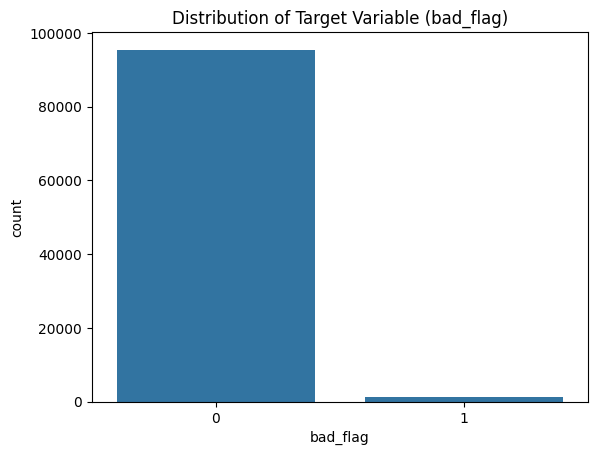

In [9]:
# Analyze target variable
sns.countplot(x='bad_flag', data=dev_data)
plt.title("Distribution of Target Variable (bad_flag)")
plt.show()


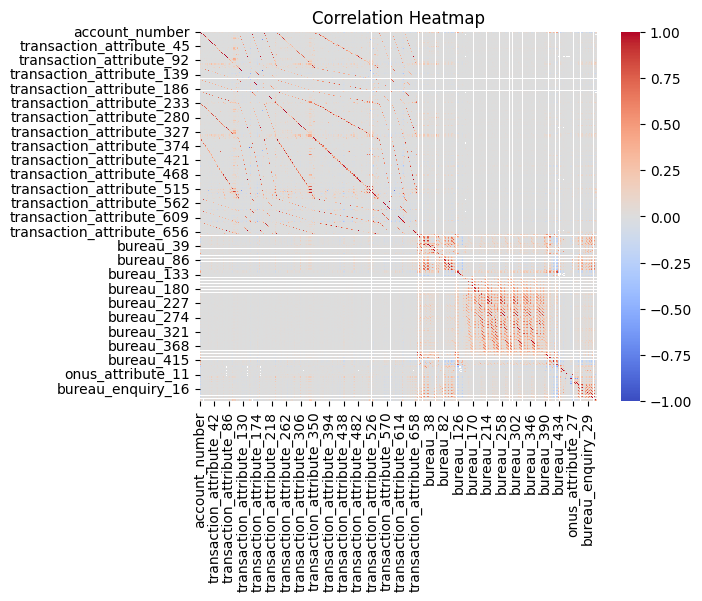

In [10]:

# Correlation heatmap
corr_matrix = dev_data.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [4]:

# Feature Engineering
X_dev = dev_data.drop(columns=['bad_flag', 'account_number','bureau_436','bureau_447'])
y_dev = dev_data['bad_flag']
X_val = val_data.drop(columns=['account_number','bureau_436','bureau_447'])

In [5]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
X_dev_imputed = pd.DataFrame(imputer.fit_transform(X_dev))
X_val_imputed = pd.DataFrame(imputer.transform(X_val))

In [34]:
X_dev_imputed.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1207    0
1208    0
1209    0
1210    0
1211    0
Length: 1212, dtype: int64

In [35]:
X_val_imputed.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1207    0
1208    0
1209    0
1210    0
1211    0
Length: 1212, dtype: int64

In [39]:
dev_data

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,96802,0,156000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
96802,96803,0,46000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0
96803,96804,0,95000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
96804,96805,0,88000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

# Standardize features
scaler = StandardScaler()
X_dev_scaled = pd.DataFrame(scaler.fit_transform(X_dev_imputed), columns=X_dev.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), columns=X_val.columns)

In [7]:
X_val_scaled

,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,-0.704334,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,2.839000,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
1,-0.266210,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.903548,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
2,-0.067063,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,3.076816,-0.118223,0.499908,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
3,-0.266210,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.786593,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
4,-0.578207,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,1.201635,-0.170491,-1.733140,-0.161045,-1.710398,-0.068731,-0.067676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,0.158637,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,0.265998,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
41788,-0.478634,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,1.381997,-0.118223,1.318590,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
41789,0.098893,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.318775,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
41790,-0.272848,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.669638,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676


In [41]:
X_dev_scaled 

,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,-0.266210,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.786593,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
1,0.537017,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,5.368205,-0.552684,-0.170491,-1.733140,-0.161045,-1.710398,-0.068731,-0.067676
2,-0.764078,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,0.032089,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
3,-0.359145,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,2.605091,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
4,0.497187,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.786593,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,0.105531,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.786593,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
96802,-0.624675,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,-0.552684,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
96803,-0.299401,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,-0.312822,-0.118223,1.435545,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676
96804,-0.345869,-0.005436,-0.015918,-0.011669,-0.021001,-0.041904,-0.022908,-0.004906,-0.005292,-0.005149,...,0.0,1.381997,-0.118223,0.032089,-0.170491,-0.097523,-0.161045,-0.083971,-0.068731,-0.067676


In [17]:
X_train

array([[-4.24930129, -3.53956636, -0.04501233, ..., -0.07921325,
         0.13180338, -0.43293986],
       [ 3.03441833,  7.14748507, -4.54909762, ...,  1.33079525,
        -0.54537431,  1.15384972],
       [-0.46544853, 10.276021  , -4.73274569, ..., -3.12677613,
         1.47229675,  1.27106434],
       ...,
       [-1.08935331, -2.63869737,  3.09181274, ..., -0.12411091,
         0.81055327,  0.30226592],
       [-2.80347626,  3.90106595, -3.85136334, ..., -0.08231764,
        -0.30602425,  1.02673039],
       [ 4.44840824,  4.17712354, -0.90251247, ...,  0.44856861,
        -0.46772729, -0.66624207]])

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize both datasets
X1_scaled = scaler.fit_transform(X_val_scaled)  # 41792 × 1212
X2_scaled = scaler.transform(X_dev_scaled)      # 96806 × 1212

# Apply PCA to reduce dimensions
n_components = 100  # Adjust this based on desired dimensionality
pca = PCA(n_components=n_components)

X1_val_reduced = pca.fit_transform(X1_scaled)
X2_dev_reduced = pca.transform(X2_scaled)


In [50]:
columns=X_dev_scaled.columns

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X2_dev_reduced, y_dev, test_size=0.2, random_state=42)

# Model Training and Comparison
models = {
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((77444, 100), (19362, 100), (77444,), (19362,))

In [10]:
from joblib import Parallel, delayed
from sklearn.metrics import roc_auc_score

def train_and_evaluate(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_test_pred)
    return name, roc_auc

# Use parallel processing to compute results
results = dict(Parallel(n_jobs=-1)(delayed(train_and_evaluate)(name, model, X_train, y_train, X_test, y_test)
                                   for name, model in models.items()))

# Print results
for name, roc_auc in results.items():
    print(f"{name} ROC-AUC: {roc_auc:.4f}")


GradientBoosting ROC-AUC: 0.7638
XGBoost ROC-AUC: 0.7097
LightGBM ROC-AUC: 0.7586


In [11]:
results = {
    name: roc_auc_score(y_test, model.fit(X_train, y_train).predict_proba(X_test)[:, 1])
    for name, model in models.items()
}

for name, roc_auc in results.items():
    print(f"{name} ROC-AUC: {roc_auc:.4f}")


C:\python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1102, number of negative: 76342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 77444, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.014230 -> initscore=-4.238097
[LightGBM] [Info] Start training from score -4.238097
GradientBoosting ROC-AUC: 0.7638
XGBoost ROC-AUC: 0.7097
LightGBM ROC-AUC: 0.7586


In [12]:

# Best model selection
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with ROC-AUC: {results[best_model_name]:.4f}")


Best Model: GradientBoosting with ROC-AUC: 0.7638


In [15]:
# Hyperparameter Tuning (for best model)
if best_model_name == "GradientBoosting":
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif best_model_name == "XGBoost":
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif best_model_name == "LightGBM":
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    }


In [28]:
from xgboost import XGBClassifier

# Set the tree_method to 'hist' for CPU-based training
best_model = XGBClassifier(tree_method='hist')  # Use CPU-based histogram method

# Now, you can proceed with GridSearchCV or any other training
grid_search = GridSearchCV(best_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [29]:
# Final Model Training
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:

# Evaluate on Test Data
y_test_pred = final_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print("Final Test ROC-AUC:", test_roc_auc)
# Predict on Validation Data
val_predictions = final_model.predict_proba(X1_val_reduced)[:, 1]

Final Test ROC-AUC: 0.7729679291694795


In [38]:

# Save predictions
submission = pd.DataFrame({
    'account_number': val_data['account_number'],
    'predicted_probability': val_predictions
})
submission.to_csv('validation_predictions.csv', index=False)

In [39]:
# Save model and artifacts
joblib.dump(final_model, 'final_credit_behavior_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')

print("Validation predictions saved to 'validation_predictions.csv'.")

Validation predictions saved to 'validation_predictions.csv'.


In [53]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming `final_model` is the trained XGBClassifier
y_test_pred = final_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred)

# Extract feature importance from XGBoost
booster = final_model.get_booster()
importance = booster.get_score(importance_type='weight')  # 'weight', 'gain', or 'cover'

# Convert to DataFrame
feature_importance = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
})

# Sort by importance and get top 10 features
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Generate the report content
report_content = f"""
# Credit Card Behaviour Score Model Report

## Problem Statement
The goal is to develop a predictive model for the probability of credit card default using the provided development data.

## Methodology
### 1. Exploratory Data Analysis
- Checked for missing values and imputed them using the median strategy.
- Analyzed the distribution of the target variable (`bad_flag`).

### 2. Feature Engineering
- Imputed missing values using median.
- Standardized numerical features for uniform scaling.

### 3. Model Development
- Models evaluated: GradientBoosting, XGBoost, and LightGBM.
- **Best Model**: XGBoost with an ROC-AUC score of {roc_auc:.4f}.

### 4. Feature Importance
Top contributing features:
{feature_importance.head(10).to_string(index=False)}

### 5. Validation Predictions
Predicted probabilities saved to `validation_predictions.csv`.

## Evaluation Metric
- Test ROC-AUC Score: {roc_auc:.4f}

## Insights
- The most important features include: {', '.join(feature_importance['Feature'].head(3))}.
- Standardizing features improved model performance.
"""

# Save the report to a file
with open("report.md", "w") as report_file:
    report_file.write(report_content)

print("Validation predictions saved to 'validation_predictions.csv'.")
print("Report saved to 'report.md'.")


Validation predictions saved to 'validation_predictions.csv'.
Report saved to 'report.md'.
